## Initializing the session

Instanciate a `Session` class and indicate your own username. Use the method `init_players()` if player names are known to you. Un-initialized player names will be prompted upon detection. Rename the player if it is an alternative username from another player (e.g. renaming Alice to Bob will make the session treat Alice as action from Bob. Useful when analyzing multiple sessions where one player might have used different usernames). Load entries from csv files with `load_entries()`. You can also load multiple csv logs into one session.


In [1]:
from classes import Session
from classes.utils import load_entries_from_csv, pretty_cards

player_names = ["Player1", "Player2", "Player3"]

session = Session(own_id="Player1")
session.init_players(player_names)
entries1 = load_entries_from_csv("data/demo1.csv")
entries2 = load_entries_from_csv("data/demo2.csv")
session.load_entries(entries1, entries2)
print(f"\n\nInstanciated players: {[player for player in session.players]}")
print("++++change")
print("_average_ is a dummy Player instance to track the session average statistics.")

Current profiles: ['_average_', 'Player1', 'Player2', 'Player3']
Current profiles: ['_average_', 'Player1', 'Player2', 'Player3', 'Player5']


Instanciated players: ['_average_', 'Player1', 'Player2', 'Player3', 'Player5', 'Player4']
_average_ is a dummy Player instance to track the session average statistics.


## Recording player stats and updating player profiles

After loading the csv log files into the session, use `log_session_stats()` to traverse through hands and record player actions, use `update_player_profiles()` to calculate player statistics, such as VPIP, PFR, etc.

In [2]:
myself = session.players[session.own_id]
print("Before profile update\n", myself)
session.log_session_stats(reset_players=True)
session.update_player_profiles()
print("After Profile update\n", myself)

Before profile update
 +-------+---------+
| Name  | Player1 |
+-------+---------+
| VPIP  |         |
+-------+---------+
| AF    |         |
+-------+---------+
| WTSD  |         |
+-------+---------+
| PFR   |         |
+-------+---------+
| 3-Bet |         |
+-------+---------+
| 4-Bet |         |
+-------+---------+
| 5-Bet |         |
+-------+---------+
| C-Bet |         |
+-------+---------+
| 2Ba   |         |
+-------+---------+
| 3Ba   |         |
+-------+---------+
| F-PFR |         |
+-------+---------+
| F-3B  |         |
+-------+---------+
| F-4B  |         |
+-------+---------+
| F-CB  |         |
+-------+---------+
| F-2Ba |         |
+-------+---------+
| F-3Ba |         |
+-------+---------+
| Trap  |         |
+-------+---------+
| Hands | (0)     |
+-------+---------+
After Profile update
 +-------+---------+
| Name  | Player1 |
+-------+---------+
| VPIP  | 63.57%  |
+-------+---------+
| AF    | 2.37    |
+-------+---------+
| WTSD  | 2.37    |
+-------+------

## Print out a specific hand in the session

In [3]:
print(session[70])

+------------+--------------+
| Hand       | ojurs3cmzucc |
+------------+--------------+
| SB:BB:ANTE | 5:10:0       |
+------------+--------------+
| Holdings   | Not recorded |
+------------+--------------+
| Action from   | Description   |   Player2 |   Player5 |   Player4 |   Player3 |
|---------------+---------------+-----------+-----------+-----------+-----------|
|               | start         |         5 |        10 |         0 |         0 |
| Player4       | Call          |         5 |        10 |        10 |         0 |
| Player3       | PFR           |         5 |        10 |        10 |        36 |
| Player2       | Call          |        36 |        10 |        10 |        36 |
| Player5       | Call          |        36 |        36 |        10 |        36 |
| Player4       | Call          |        36 |        36 |        36 |        36 |
=====  ==========
  Pot  Flop
=====  ==========
  144  ♦3, ♣5, ♣6
=====  ==========
| Action from   | Description   |   Player2 |   Pl

## Display player statistics in this session instance

Red indicates above session average and blue indicates below session average. The number of hands tracked are indicated beside the name of each player.

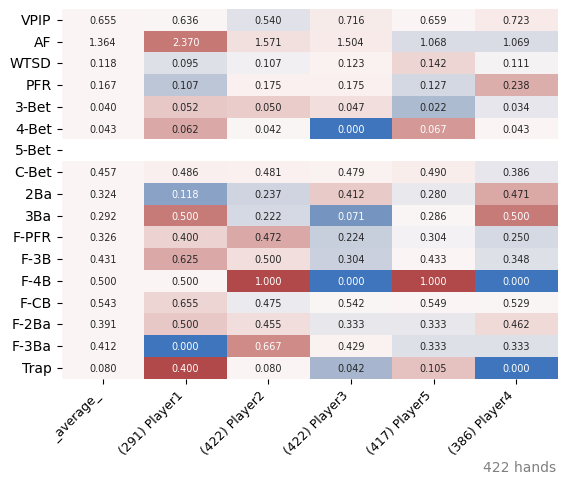

In [4]:
session.plot_profile()

## Use `find_hands()` to filter hands that contains specific actions

Available search categories:
- Call 
- Bet
- Raise
- Check-Raise
- Donk
- PFR
- 3-Bet
- 4-Bet
- 5-Bet
- 5-Bet+
- C-Bet
- 2-Barrel
- 3-Barrel

Use "|" to indicate `or`, use a separate argument to indicate `and`, use "!" in front of search category to indicate exclusion. 

> #### Example:
> ```python
> session.find_hands("PFR", "!3-Bet")
> ```
> The above attempts to find all hands within the session that has a player performed PFR and no 3-Betting occured.
> ```python
> session.find_hands("3-Bet|4-Bet", "Donk")
> ```
> The above attempts to find all the hands within the session that has a player performed 3-Bet or 4-Bet, and has at least one occurence of a donk bet.
>
> ```python
> player = session.players["Player3"]
> player.find_hands("PFR|3-Bet|4-Bet|5-Bet", position=2)
> ```
> When using this method on a `Player` class, use `position` kwarg to indicate the position the actions were performed from. Example above attempts to find all the hands that this player has performed one of PFR, 3-Bet, 4-Bet or 5-Bet as UTG.

notice that when searching for hands played by other players, only the hands shown by them can be logged into the logger and analyzed.

In [5]:
found_hand_id_from_session = session.find_hands("PFR", "!3-Bet")
print(f"Found {len(found_hand_id_from_session)} matching hands where a player opened preflop and no other players performed 3-Betting")

found_hand_id_from_session = session.find_hands("3-Bet|4-Bet", "Donk")
print(f"Found {len(found_hand_id_from_session)} matching hands where players 3-Bet or 4-Bet preflop and at least one donk bet postflop in the entire session")

found_hand_id_from_myself = myself.find_hands("PFR|3-Bet|4-Bet|5-Bet|5-Bet+")
print(f"Found {len(found_hand_id_from_myself)} matching hands for me where I played aggressively preflop")

player3 = session.players["Player3"]
found_hand_id_from_player3 = player3.find_hands('PFR', position=-1)
print(f"\n\nOut of the {len(player3.hands)} hands Player3 revealed, he opened preflop on the button in {len(found_hand_id_from_player3)} of them:")
for i, id in enumerate(found_hand_id_from_player3):
    # pretty_cards() takes multiple arguments (all of which are phevaluator.card.Card objects) and renders them as colored suit/rank card representation
    print(pretty_cards(*player3.hands[id]["hand"]))
print("In the case when he had jacks (out of the above hands) on the button, this is how the hand played out:")
print(session[found_hand_id_from_player3[-1]])

Found 285 matching hands where a player opened preflop and no other players performed 3-Betting
Found 4 matching hands where players 3-Bet or 4-Bet preflop and at least one donk bet postflop in the entire session
Found 39 matching hands for me where I played aggressively preflop


Out of the 107 hands Player3 revealed, he opened preflop on the button in 7 of them:
♦J, ♦3
♥7, ♠2
♠A, ♦6
♦8, ♥4
♥5, ♠4
♠T, ♦4
♠J, ♥J
In the case when he had jacks (out of the above hands) on the button, this is how the hand played out:
+------------+--------------+
| Hand       | e7hw5phvaj3r |
+------------+--------------+
| SB:BB:ANTE | 5:10:1       |
+------------+--------------+
| Holdings   | ♥A, ♣4       |
+------------+--------------+
| Action from   | Description   |   Player1 |   Player2 |   Player4 |   Player5 |   Player3 |
|---------------+---------------+-----------+-----------+-----------+-----------+-----------|
|               | start         |         6 |        11 |         1 |         1 |  

## Display hand type chart
Display preflop (or postflop) action charts

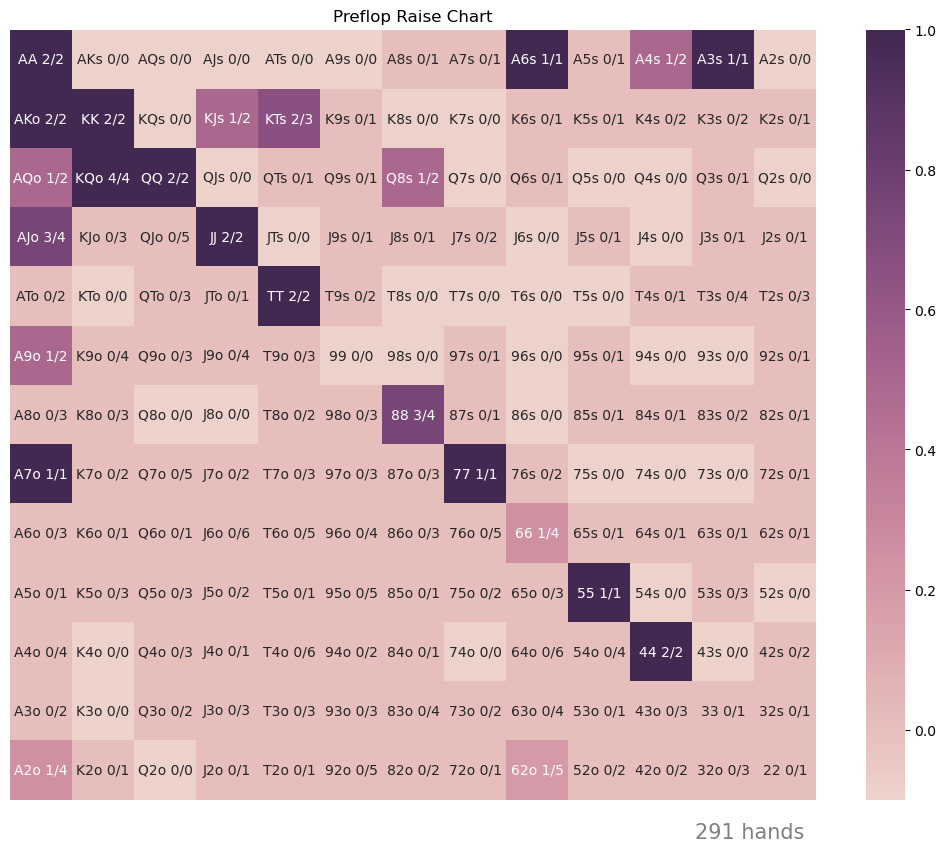

In [6]:
my_aggressive_hands = myself.find_hands("PFR|3-Bet|4-Bet|5-Bet|5-Bet+")
myself.hand_chart(my_aggressive_hands, show_frequency=True, title="Preflop Raise Chart")

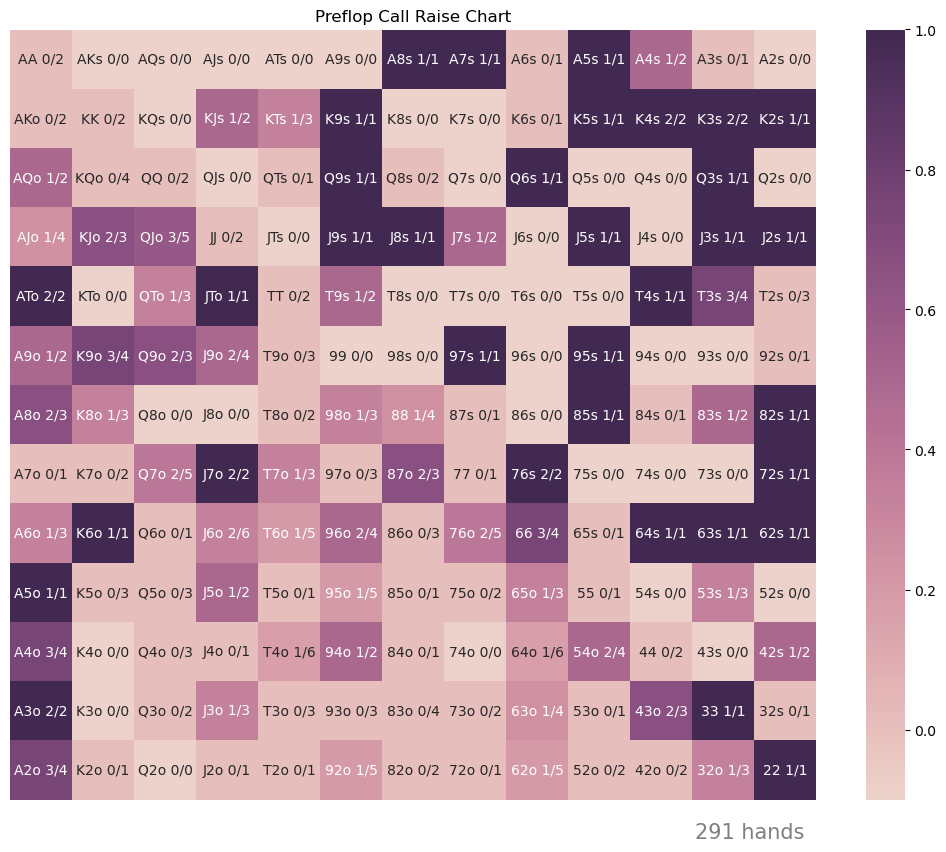

In [7]:
my_passive_hands = myself.find_hands("Call", "!PFR", "!3-Bet", "!4-Bet", "!5-Bet", "!5-Bet+")  # hands that I called without raising
pfr_hands = session.find_hands("PFR")  # all hands that at least one player opened preflop
passive_call_PFR_hands = [hand for hand in my_passive_hands if hand in pfr_hands]  # hands that I called a raise preflop without raising again
myself.hand_chart(passive_call_PFR_hands, show_frequency=True, title="Preflop Call Raise Chart")

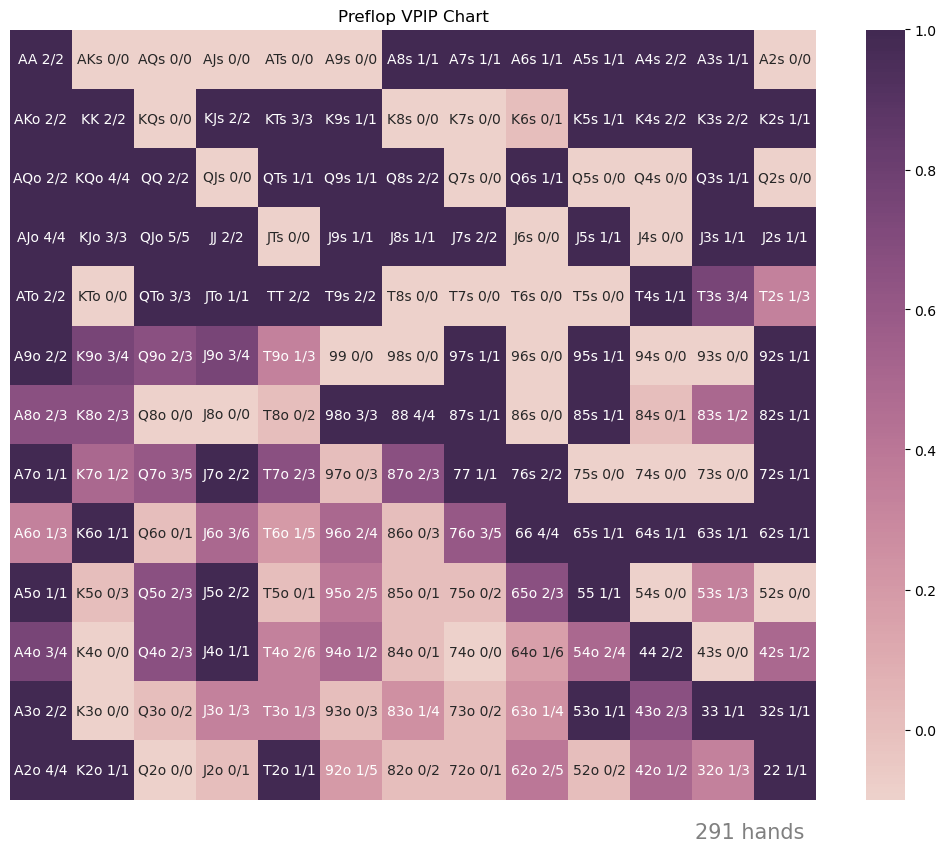

In [8]:
my_vpip_hands = myself.find_hands("Call|PFR|3-Bet|4-Bet|5-Bet|5-Bet+")
myself.hand_chart(my_vpip_hands, show_frequency=True, title="Preflop VPIP Chart")